In [0]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import matplotlib.image as mpimg
from scipy import ndimage

In [0]:
def Noise_Gaussian(img):
  mean=0
  sigma=5
  noisy=np.random.normal(mean,sigma,img.shape)
  image_noise=img+noisy
  return image_noise

def Mse(img1,img2):
  return np.square(np.subtract(img1,img2)).mean()  

In [0]:
img=plt.imread("/content/sample_data/messi.jpg").astype('uint8')
noisy=Noise_Gaussian(img)
noisy=noisy.astype('uint8')


In [0]:
def conv_trans(image):
  row= image.shape[0]
  column= image.shape[1]
  image_copy= image.copy()
  for i in range(row):
    for j in range(column):
      image_copy[i][j]=image[row-1-i][column-1-j]
  return image_copy

def convolve2d(image, kernel):
  kernel1=conv_trans(kernel)
  row= image.shape[0]
  column= image.shape[1]
  k_row=kernel.shape[0]
  k_column=kernel.shape[1]
  h= kernel.shape[0]//2
  w= kernel.shape[1]//2
  conv_image=np.zeros(image.shape)
  for i in range(row):
    for j in range(column):
      sum=0
      for row_kernel in range(k_row):
        for column_kernel in range(k_column):
          #מניעת מכפלה כאשר האינדקסים הם שלילים או מעבר לגודל התמונה
          if i-h+row_kernel >= 0 and i-h+row_kernel < row and j-w+column_kernel >= 0 and j-w+column_kernel <column:
            sum+= image[i-h+row_kernel][j-w+column_kernel]*kernel1[row_kernel][column_kernel]
      conv_image[i][j]=sum
  return conv_image

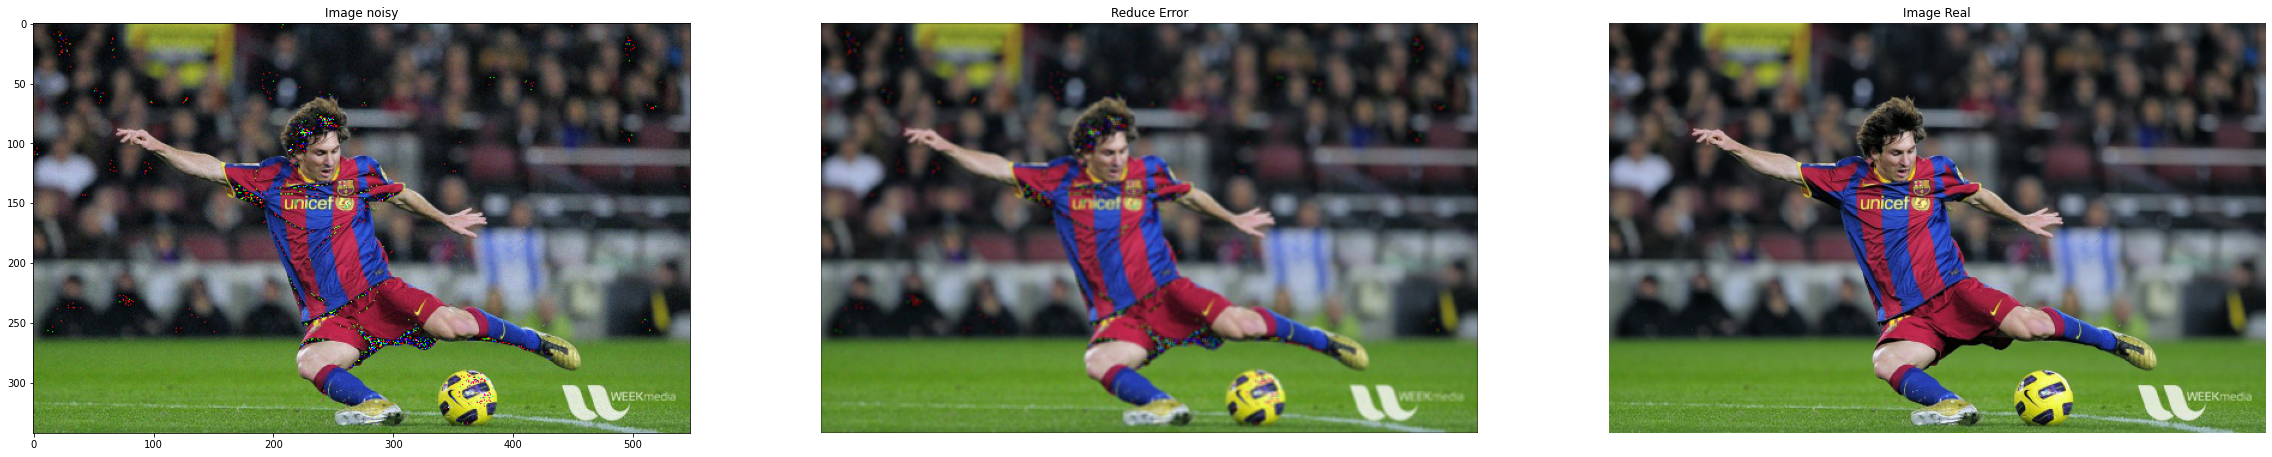

Mse noise and real:  24.79181428835674
Mse reduce and real:  20.952745052005522
Abs noise and reduce:  62444245


In [5]:
kernel=np.array([[1,1,1],[1,1,1],[1,1,1]])/9
noisy1=noisy.copy()
noisy1=noisy1.astype(np.float)
conv_image=convolve2d(noisy, kernel)
conv_image=conv_image.astype('uint8')
plt.figure(figsize=[40, 20])
plt.subplot(1,3,1)
plt.imshow(noisy,cmap=plt.cm.gray)
plt.title("Image noisy")
plt.subplot(1,3,2)
plt.axis('off')
plt.imshow(conv_image,cmap=plt.cm.gray)
plt.title("Reduce Error")
plt.axis('off')
plt.subplot(1,3,3)
plt.imshow(img,cmap=plt.cm.gray)
plt.title("Image Real")
plt.axis('off')
plt.show()
print("Mse noise and real: ",Mse(noisy,img))
print("Mse reduce and real: ",Mse(conv_image,img))
sum= np.sum(np.abs(noisy-conv_image))
print("Abs noise and reduce: ",sum)

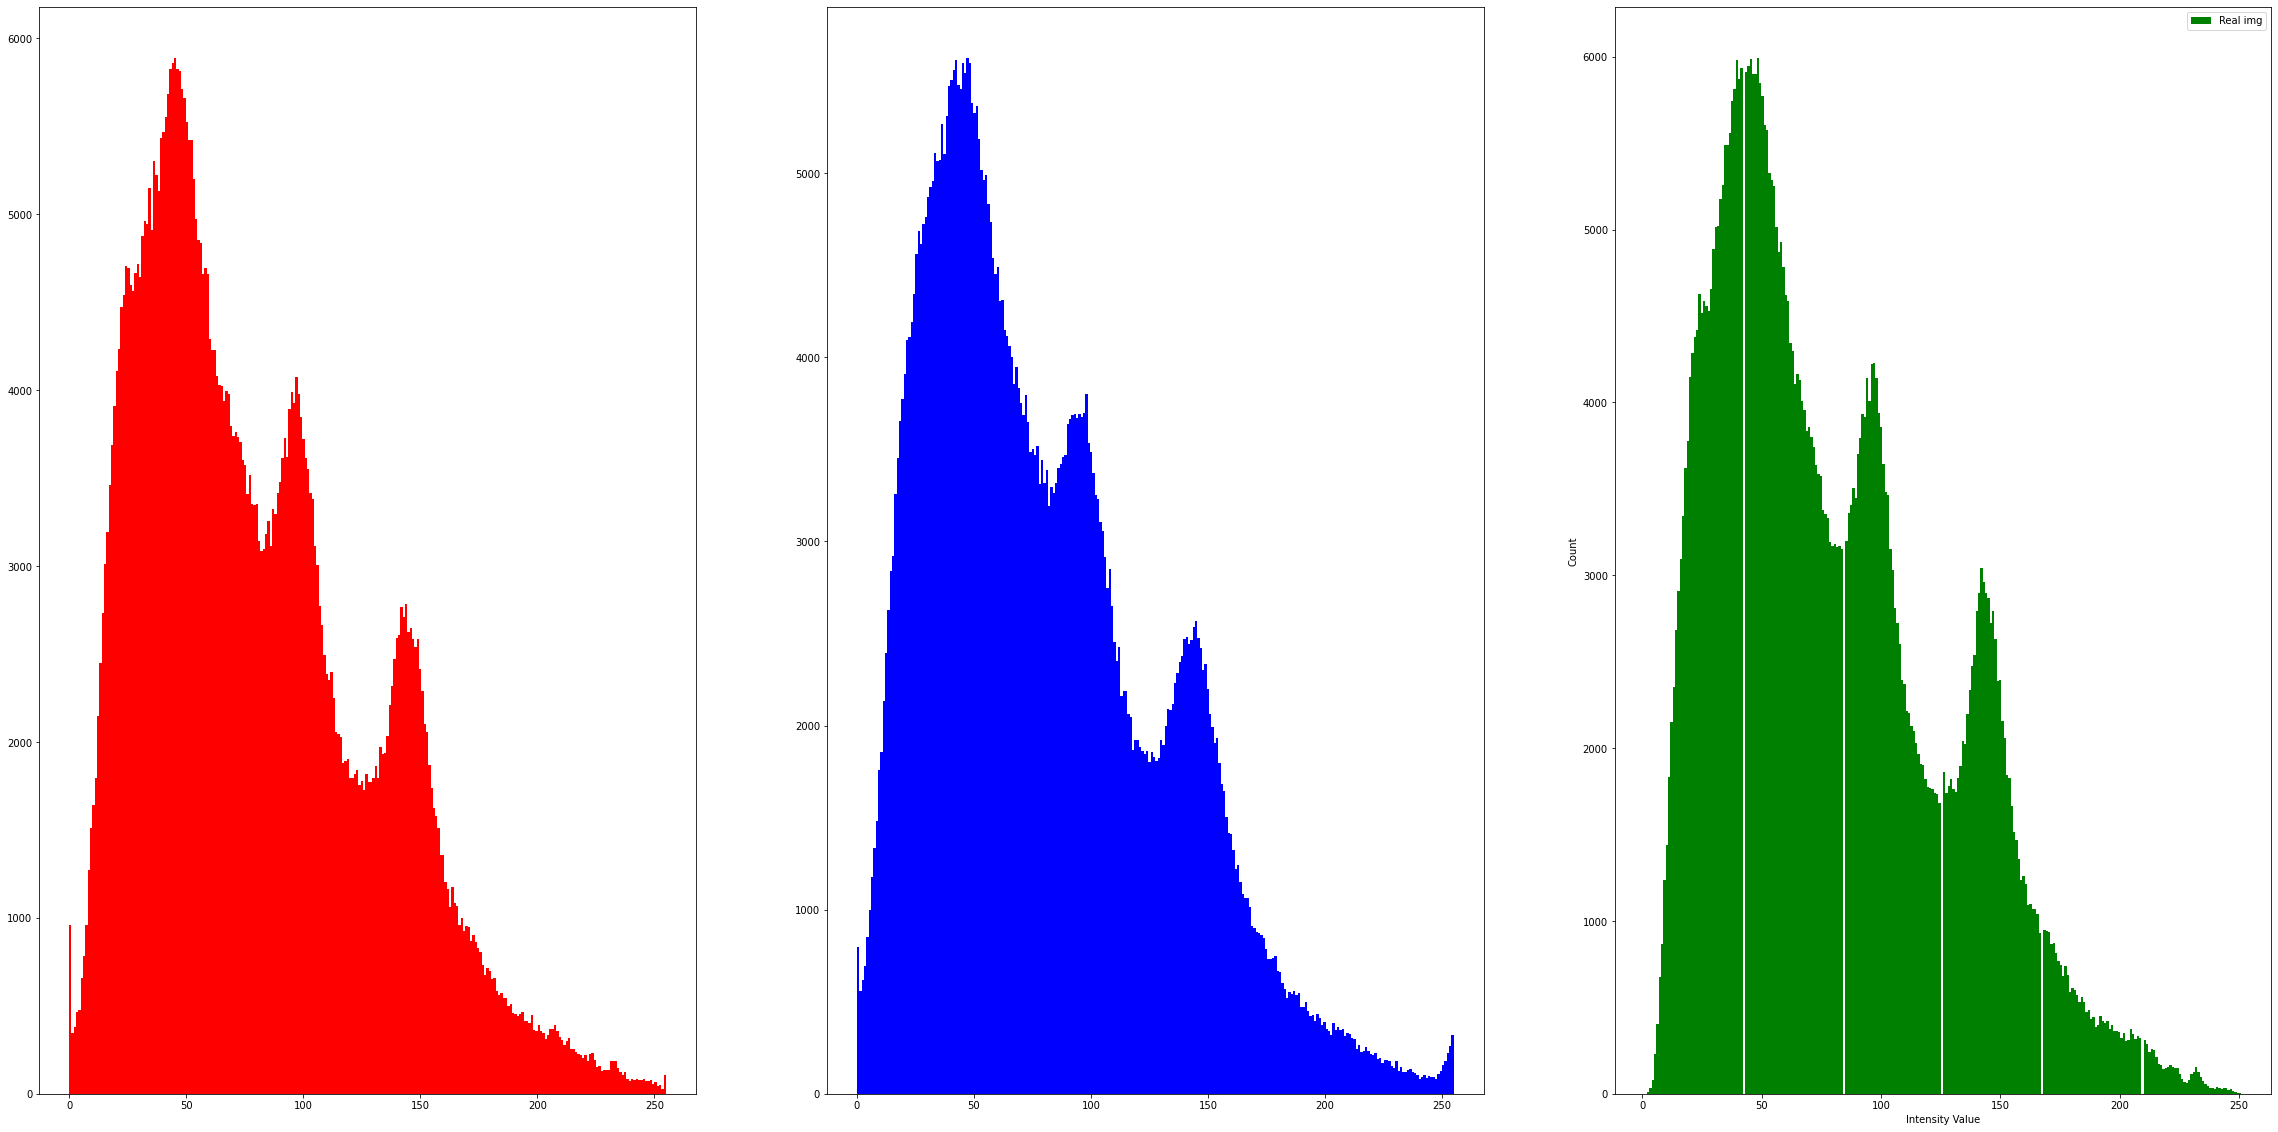

In [6]:
plt.figure(figsize=[40, 20])
plt.subplot(1,3,1)
plt.hist(img.ravel(), bins=256,color='red')
plt.subplot(1,3,2)
plt.hist(noisy.ravel(), bins=256,color='blue')
plt.subplot(1,3,3)
plt.hist(conv_image.ravel(), bins=256,color='green')
plt.xlabel('Intensity Value')
plt.ylabel('Count')
plt.legend(['Real img','Noise','reduce'])
plt.show()

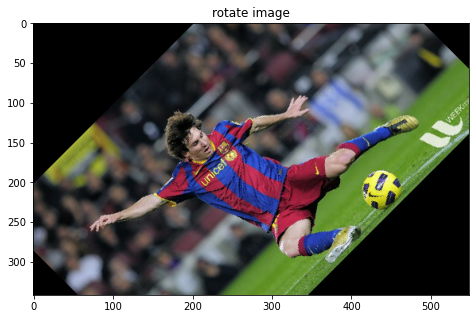

In [7]:
def rotate(img,angle):
  theta = np.radians(angle)
  rotate_img=np.zeros_like(img)
  if len(img.shape)==2:
    x,y=np.meshgrid(np.arange(rotate_img.shape[1]),np.arange(rotate_img.shape[0]))
    y-=img.shape[0]//2
    x-=img.shape[1]//2
    x_index= (x*np.cos(theta)-y*np.sin(theta)).astype(np.int32)+img.shape[1]//2
    y_index= (x*np.sin(theta)+y*np.cos(theta)).astype(np.int32)+img.shape[0]//2
    for i in range(img.shape[0]):
      for j in range(img.shape[1]):
        y= y_index[i][j]
        x= x_index[i][j]
        if 0 <=  x < img.shape[1] and 0 <=y <img.shape[0]:
          rotate_img[i][j]=img[y][x]
    return rotate_img
  else:
    for dim in range(img.shape[2]):
      rotate_img[:,:,dim]=rotate(img[:,:,dim],angle)
    return rotate_img
        

plt.figure(figsize=[10, 5])
img=plt.imread("/content/sample_data/messi.jpg").astype(np.float)
rotate_img=rotate(img,45)
plt.title("rotate image")
rotate_img=rotate_img.astype('uint8')
plt.imshow(rotate_img)
plt.show()

#Encode And Decode 

In [0]:
def encode(img1,img_to_encode):
  x=0
  y=0
  l=0
  for i in range(img_to_encode.shape[0]):
    for j in range(img_to_encode.shape[1]):
      for k in range(img_to_encode.shape[2]):
        for bit in range(8):
          img1[x][y][l]=(img1[x][y][l]&254)|((img_to_encode[i][j][k]&(1<<bit))>>bit)
          l=l+1
          if l == img1.shape[2]:
            y=y+1
            l=0
            if y == img1.shape[1]:
              x=x+1
              y=0
  return img1

def decode(img,shape_decode_img):
  x=0
  y=0
  l=0
  decode_img=np.zeros(shape_decode_img)
  for i in range(shape_decode_img[0]):
    for j in range(shape_decode_img[1]):
      for k in range(shape_decode_img[2]):
        sum=0
        for bit in range(8):
          sum|=(img[x][y][l]&1)<<(bit)
          l=l+1
          if l == img.shape[2]:
            y=y+1
            l=0
            if y == img.shape[1]:
              x=x+1
              y=0
        decode_img[i][j][k]=sum
  return decode_img


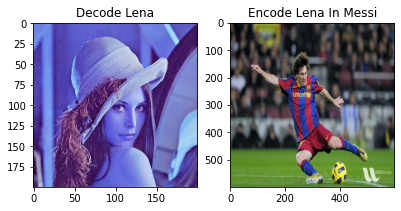

In [9]:
img_messi=plt.imread("/content/sample_data/messi.jpg").astype('uint8')
lena=cv2.imread("/content/sample_data/Lenna.png").astype('uint8')
img_messi=cv2.resize(img_messi, (600,600))
lena=cv2.resize(lena, (200,200))
new_messi=encode(img_messi,lena)
new_lena=decode(new_messi,lena.shape)
plt.figure(figsize=[10, 5])
new_lena=new_lena.astype('uint8')
plt.subplot(1,3,1)
plt.imshow(new_lena)
plt.title("Decode Lena")
plt.subplot(1,3,2)
plt.imshow(new_messi)
plt.title("Encode Lena In Messi")
plt.show()

#Augmtation

In [0]:
class augmentation():
  
  def __init__(self,img):
    self.img=img

  def flip(self,min_max_factor=(0,3),p=0.5):
    if self.prob(p):
      factor=self.random_min_to_max(min_max_factor[1],min_max_factor[0])
      return np.flip(self.img,axis=factor)
    return self.img

  def zoom_in(self,min_max_factor=(1,2),p=0.5):
    if self.prob(p):
      factor=self.random_min_to_max(min_max_factor[1],min_max_factor[0])
      shape=self.img.shape
      crop_y=shape[0]//factor
      crop_x= shape[1]//factor
      offset_x=np.random.randint(crop_x)
      offset_y=np.random.randint(crop_y)
      new_img=self.img[offset_y:min(offset_y+crop_y,shape[0]),offset_x:min(offset_x+crop_x,shape[1])]
      return cv2.resize(new_img,(shape[1],shape[0]))
    return self.img

  def Gaussian_Blur(self,min_max_factor=(3,7),p=0.5):
    if self.prob(p):
      factor=self.random_min_to_max(min_max_factor[1],min_max_factor[0])
      factor= (factor+1)%2+factor
      img_blur=cv2.GaussianBlur(self.img,(factor,factor),0)
      return img_blur
    return self.img

  def Median_blur(self,min_max_factor=(3,7),p=0.5):
    if self.prob(p):
      factor=self.random_min_to_max(min_max_factor[1],min_max_factor[0])
      factor= (factor+1)%2+factor
      return cv2.medianBlur(self.img,factor)
    return self.img

  def crop(self,min_max_factor=(1,2),p=0.5):
    if self.prob(p):
      factor=self.random_min_to_max(min_max_factor[1],min_max_factor[0])
      crop_y=self.img.shape[0]//factor
      crop_x= self.img.shape[1]//factor
      offset_x=np.random.randint(crop_x)
      offset_y=np.random.randint(crop_y)    
      return self.img[offset_y:min(offset_y+crop_y,self.img.shape[0]),offset_x:min(offset_x+crop_x,self.img.shape[1])]
    return self.img

  def rotate(self,min_max_factor=(0,90),p=0.5):
    if self.prob(p):
      angle=self.random_min_to_max(min_max_factor[1],min_max_factor[0])
      img=ndimage.rotate(self.img, angle, reshape=False)
      return img
    return self.img
  
  def random_min_to_max(self,n1_max,n1_min):
    n1=np.random.randint(n1_max-n1_min)+n1_min
    return n1

  def prob(self,p):
    c=np.random.random(1)
    if c < p:
      return True
    return False 

In [0]:
class create_aug(augmentation):
  def __init__(self, img, p_list, aug_list, list_factor):
        super().__init__(img)
        #string list of prob should be like size of list_aug
        self.list_p=p_list
        #should be like size of aug_list ,-1 use default
        self.list_factor=list_factor
        #string name of aug
        self.aug_list=aug_list
        #method of super class
        self.dict_aug={'rotate':self.rotate,'crop':self.crop,'median':self.Median_blur,'gaussian':self.Gaussian_Blur,'flip':self.flip,'zoom':self.zoom_in}

  def compose(self):
    if len(self.list_factor) != len(self.list_p) and len(self.list_p) != len(self.aug_list):
      print("the size must be equal")
      return self.img
    img_org=self.img.copy()
    for i in range(len(self.aug_list)):
      method=self.dict_aug[self.aug_list[i]]
      if method is None:
        print("the name of aug don't exist")
        return self.img
      else:
        if self.list_factor[i] != -1:
          self.img=method(min_max_factor=self.list_factor[i],p=self.list_p[i])
        else:
          self.img=method(p=self.list_p[i])
    temp=self.img.copy()
    self.img=img_org.copy()
    return temp

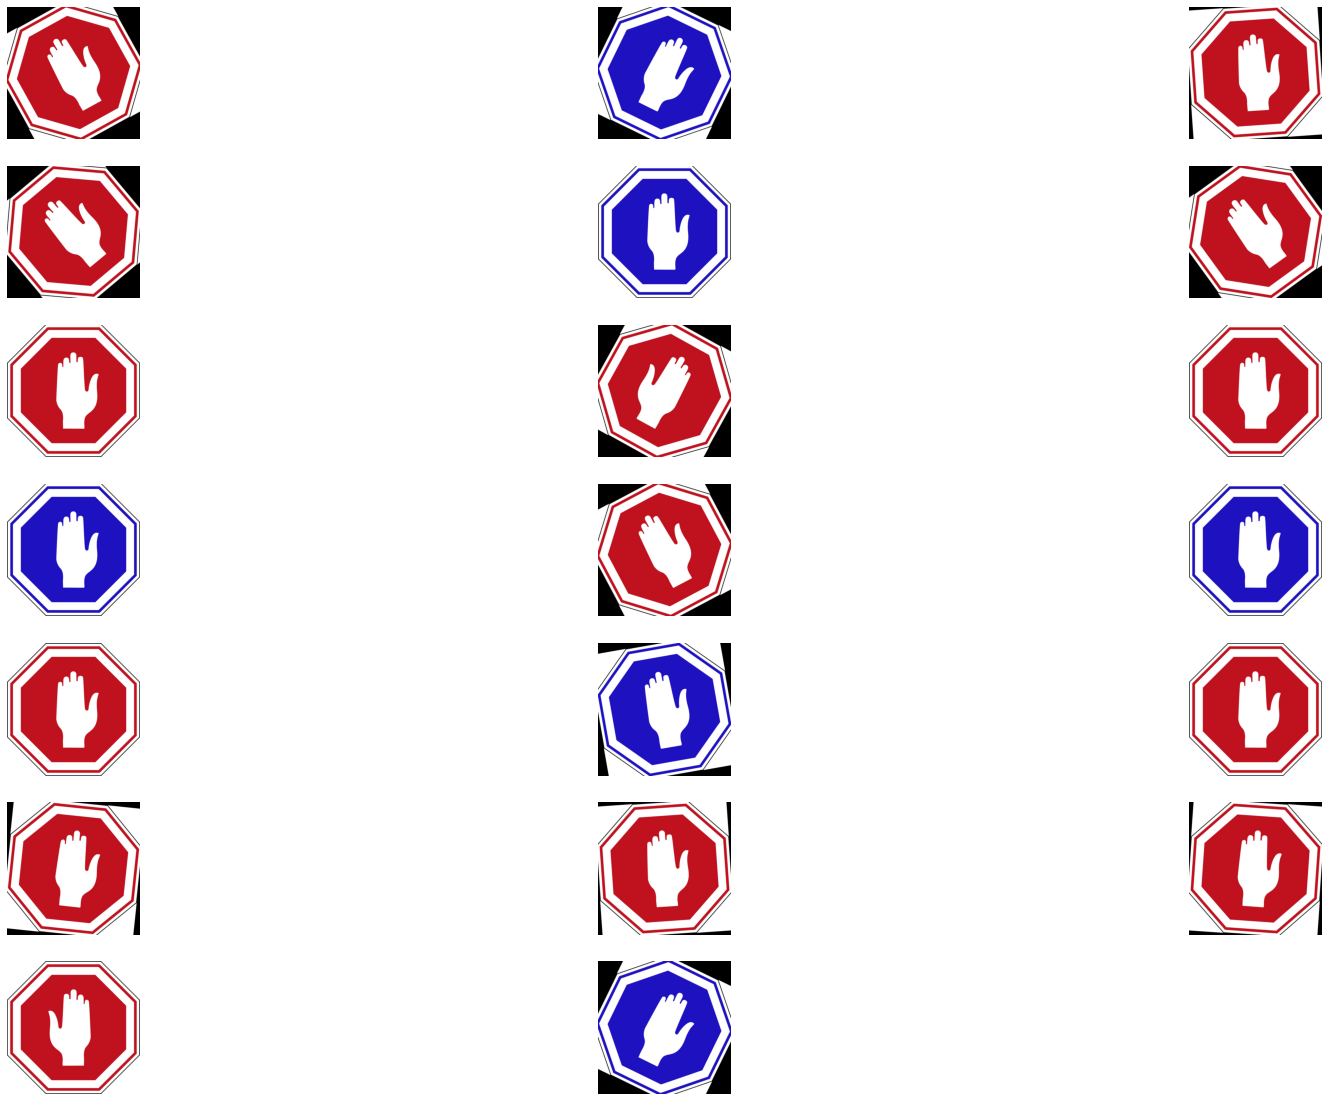

In [16]:
#Argument for Aug
list_aug_name=['median','flip','rotate']
#min_max_factor=(min here,max here)
list_factor=[(5,7), (1,3),(315,405)]
p_list=[  0.3, 0.4,0.6]
img=plt.imread("/content/sample_data/stop-sign.jpg").astype('uint8')
#Object of aug
aug1=create_aug(img,p_list,list_aug_name,list_factor)

plt.figure(figsize=[30, 20])
for i in range(20):
  plt.subplot(7,3,i+1)
  plt.imshow(aug1.compose())
  plt.axis('off')
plt.show()